## Libraries

In [6]:
import pandas as pd
import numpy as np
from crepes import ConformalClassifier, ConformalPredictiveSystem
from crepes.extras import hinge, margin, binning, DifficultyEstimator

## Data

In [8]:
data_dir = "calibration_and_test.xlsx" #directory
df_cal=pd.read_excel(data_dir,sheet_name='conf_score_25') #cal dataset with conf=0.25
df_cal.columns

Index(['filename', 'image_width', 'image_height', 'gt_obj_id', 'gt_x_center',
       'gt_y_center', 'gt_obj_width', 'gt_obj_height', 'pred_obj_id', 'TP',
       'FN', 'FP', 'pred_x_center', 'pred_y_center', 'pred_obj_width',
       'pred_obj_height', 'conf_score', 'objectness_score',
       'ascaris_conf_score', 'trichuris_conf_score', 'hookworm_conf_score',
       'schistosoma_conf_score', 'ascaris_sig'],
      dtype='object')

In [5]:
df_cal = df_cal[df_cal['pred_obj_id']!='-']
df_subset= df_cal[['gt_obj_id',
        'pred_obj_id', 
        'objectness_score',
        'ascaris_conf_score',
        'trichuris_conf_score',
        'hookworm_conf_score',
        'schistosoma_conf_score']]

C:\Users\M\AppData\Local\Temp\ipykernel_17000\1849437978.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


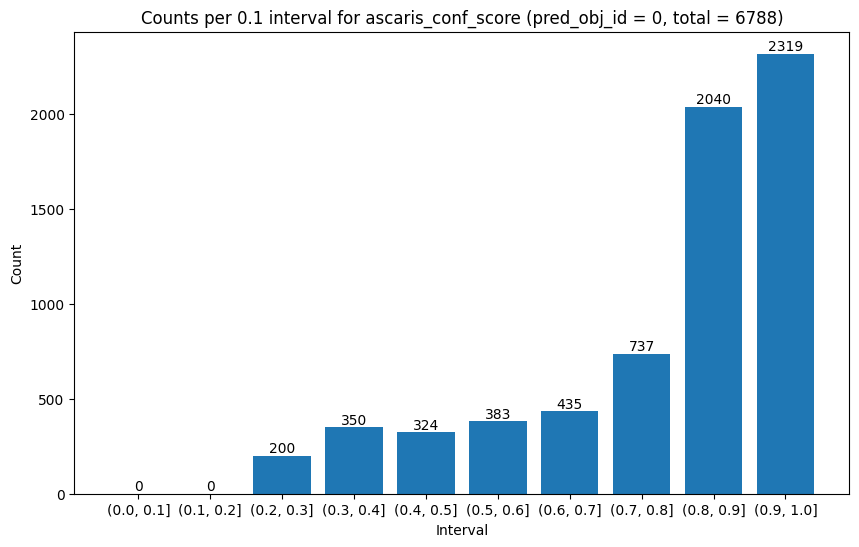

C:\Users\M\AppData\Local\Temp\ipykernel_17000\1849437978.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


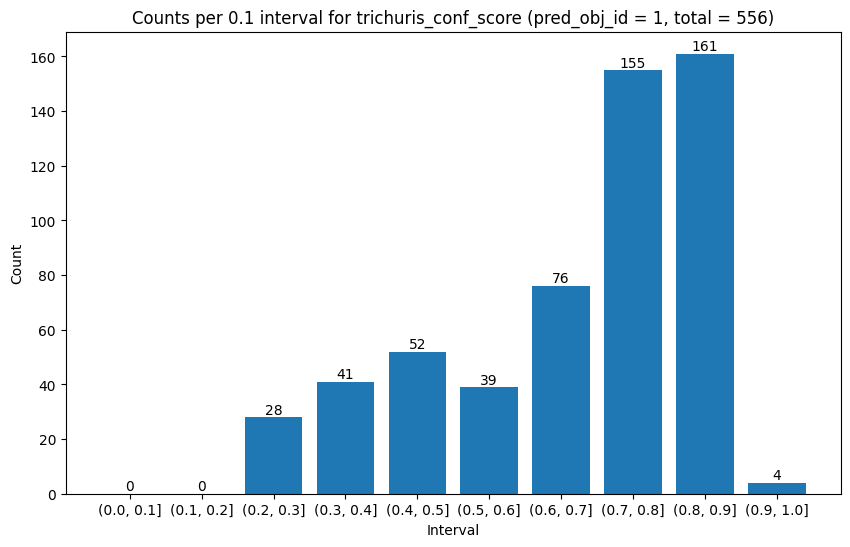

C:\Users\M\AppData\Local\Temp\ipykernel_17000\1849437978.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


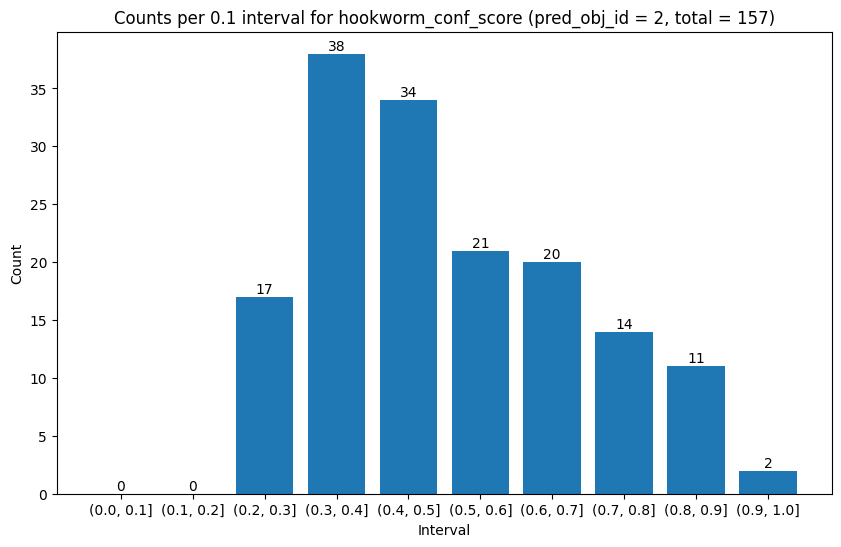

C:\Users\M\AppData\Local\Temp\ipykernel_17000\1849437978.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


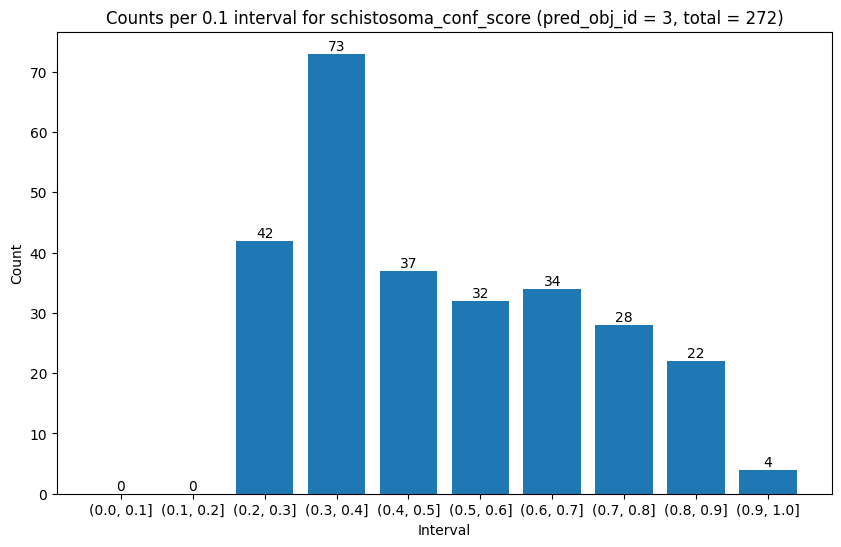

In [4]:
import matplotlib.pyplot as plt

# Define the mapping between 'pred_obj_id' and the corresponding confidence score column
mapping = {0: 'ascaris_conf_score', 1: 'trichuris_conf_score', 2: 'hookworm_conf_score', 3: 'schistosoma_conf_score'}

# Loop over the mapping
for pred_obj_id, conf_score_column in mapping.items():
    # Filter the DataFrame by 'pred_obj_id'
    df_filtered = df_subset[df_subset['pred_obj_id'] == pred_obj_id]
    
    # Categorize the data into 0.1 intervals
    df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))
    
    # Count the number of occurrences in each interval
    counts = df_filtered[conf_score_column].value_counts().sort_index()
    
    # Calculate the total count
    total_count = counts.sum()
    
    # Create a bar plot of the counts
    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index.astype(str), counts.values)
    plt.xlabel('Interval')
    plt.ylabel('Count')
    plt.title(f'Counts per 0.1 interval for {conf_score_column} (pred_obj_id = {pred_obj_id}, total = {total_count})')
    
    # Add the counts on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')
    
    plt.show()